## 1. pull your Github code 

In [1]:
!git clone https://github.com/11kartheek/cifar.git

Cloning into 'cifar'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), 249.32 KiB | 1001.00 KiB/s, done.


In [2]:

%cd cifar
# %cd ../..

/kaggle/working/cifar


## 2. prove that you are following the above structure

In [3]:
%ls

KartheekB_s11.ipynb  LICENSE  README.md  main.py  models/  utils.py


In [4]:
!pip -q install grad-cam

## import necessary functions from utils and main

In [5]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy
from utils import test_transforms, train_transforms,misclassifiedimages,denormalize_images,plot_misclassified_images,visualize_gradcam,plot_losses
from main import TestTrainSplit,net,loop,classes
import matplotlib.pyplot as plt
import numpy
import torch.backends.cudnn as cudnn

==> Building model..


#  main file is able to  pull functions that can take these params or pull functions from it and then perform operations, like (including but not limited to):
1. training and test loops
2. data split between test and train
3. epochs
4. batch size
5. which optimizer to run
6. scheduler

In [6]:
trainloader, testloader = TestTrainSplit(train_transforms,test_transforms,batch_size=512)

100%|██████████| 170498071/170498071 [00:18<00:00, 8980975.45it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)


device = "cuda" if torch.cuda.is_available() else "cpu"
net = net.to(device)
if device == "cuda":
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

num_epochs = 20

# 1. train resnet18 for 20 epochs on the CIFAR10 dataset

In [8]:
train_losses, test_losses, train_acc, test_acc = loop(num_epochs,trainloader,testloader,model=net,device=device,optimizer=optimizer,criterion=criterion,scheduler = scheduler)

EPOCH: 0


Loss=1.3945293426513672 Batch_id=97 Accuracy=39.35: 100%|██████████| 98/98 [00:35<00:00,  2.75it/s]



Test set: Average loss: 1.3222, Accuracy: 5186/10000 (51.86%)

EPOCH: 1


Loss=1.014033317565918 Batch_id=97 Accuracy=55.93: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s] 



Test set: Average loss: 1.1182, Accuracy: 6063/10000 (60.63%)

EPOCH: 2


Loss=0.9908871650695801 Batch_id=97 Accuracy=63.42: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.9745, Accuracy: 6539/10000 (65.39%)

EPOCH: 3


Loss=0.8005010485649109 Batch_id=97 Accuracy=68.34: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 1.0185, Accuracy: 6589/10000 (65.89%)

EPOCH: 4


Loss=0.7458338737487793 Batch_id=97 Accuracy=72.01: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]



Test set: Average loss: 0.8357, Accuracy: 7088/10000 (70.88%)

EPOCH: 5


Loss=0.7007642984390259 Batch_id=97 Accuracy=74.11: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.6153, Accuracy: 7845/10000 (78.45%)

EPOCH: 6


Loss=0.670434832572937 Batch_id=97 Accuracy=75.84: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s] 



Test set: Average loss: 0.6915, Accuracy: 7735/10000 (77.35%)

EPOCH: 7


Loss=0.6305996179580688 Batch_id=97 Accuracy=77.67: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.5960, Accuracy: 7962/10000 (79.62%)

EPOCH: 8


Loss=0.5148283243179321 Batch_id=97 Accuracy=79.43: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]



Test set: Average loss: 0.6155, Accuracy: 7959/10000 (79.59%)

EPOCH: 9


Loss=0.4940463602542877 Batch_id=97 Accuracy=80.49: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s] 



Test set: Average loss: 0.5455, Accuracy: 8197/10000 (81.97%)

EPOCH: 10


Loss=0.5164602994918823 Batch_id=97 Accuracy=81.54: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s] 



Test set: Average loss: 0.6022, Accuracy: 8045/10000 (80.45%)

EPOCH: 11


Loss=0.5477555394172668 Batch_id=97 Accuracy=82.61: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s] 



Test set: Average loss: 0.4801, Accuracy: 8372/10000 (83.72%)

EPOCH: 12


Loss=0.4649912118911743 Batch_id=97 Accuracy=83.30: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s] 



Test set: Average loss: 0.6481, Accuracy: 7957/10000 (79.57%)

EPOCH: 13


Loss=0.5126363039016724 Batch_id=97 Accuracy=84.30: 100%|██████████| 98/98 [00:18<00:00,  5.20it/s] 



Test set: Average loss: 0.4763, Accuracy: 8476/10000 (84.76%)

EPOCH: 14


Loss=0.4216286242008209 Batch_id=97 Accuracy=84.74: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s] 



Test set: Average loss: 0.4808, Accuracy: 8382/10000 (83.82%)

EPOCH: 15


Loss=0.401272177696228 Batch_id=97 Accuracy=85.12: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s]  



Test set: Average loss: 0.4241, Accuracy: 8582/10000 (85.82%)

EPOCH: 16


Loss=0.4162670373916626 Batch_id=97 Accuracy=86.24: 100%|██████████| 98/98 [00:18<00:00,  5.23it/s] 



Test set: Average loss: 0.4113, Accuracy: 8664/10000 (86.64%)

EPOCH: 17


Loss=0.3398841321468353 Batch_id=97 Accuracy=86.86: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s] 



Test set: Average loss: 0.4865, Accuracy: 8460/10000 (84.60%)

EPOCH: 18


Loss=0.2682883143424988 Batch_id=97 Accuracy=87.52: 100%|██████████| 98/98 [00:18<00:00,  5.22it/s] 



Test set: Average loss: 0.5260, Accuracy: 8406/10000 (84.06%)

EPOCH: 19


Loss=0.342609167098999 Batch_id=97 Accuracy=87.69: 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]  



Test set: Average loss: 0.4618, Accuracy: 8591/10000 (85.91%)



# **2.show loss curves for test and train datasets**

In [ ]:
plot_losses(train_losses, test_losses, train_acc, test_acc)

# **3.show a gallery of 10 misclassified images**

In [10]:
misclassified_images,misclassified_targets,misclassified_predictions = misclassifiedimages(net, device, testloader,count = 10)

In [11]:
denormalize_images(misclassified_images)

/tmp/ipykernel_34/710208674.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred: {classes[int(misclassified_predictions[i])]}")


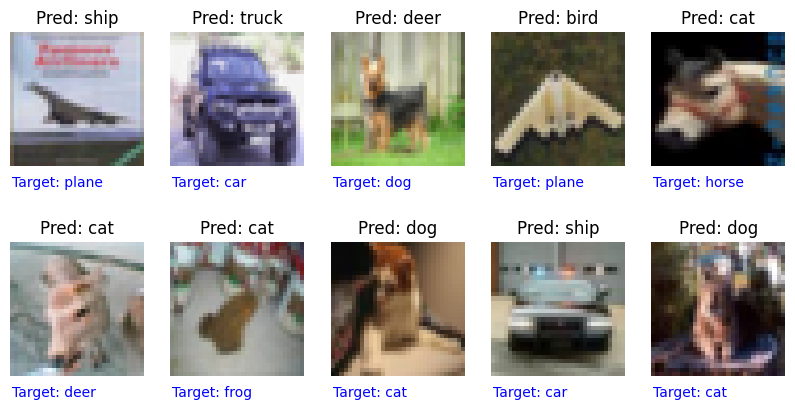

In [38]:
plot_misclassified_images(misclassified_images,misclassified_targets,misclassified_predictions)

# 4.show gradcamLinks to an external site. output on 10 misclassified images. 

/tmp/ipykernel_34/1170318328.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Pred:{classes[int(pred)]}")


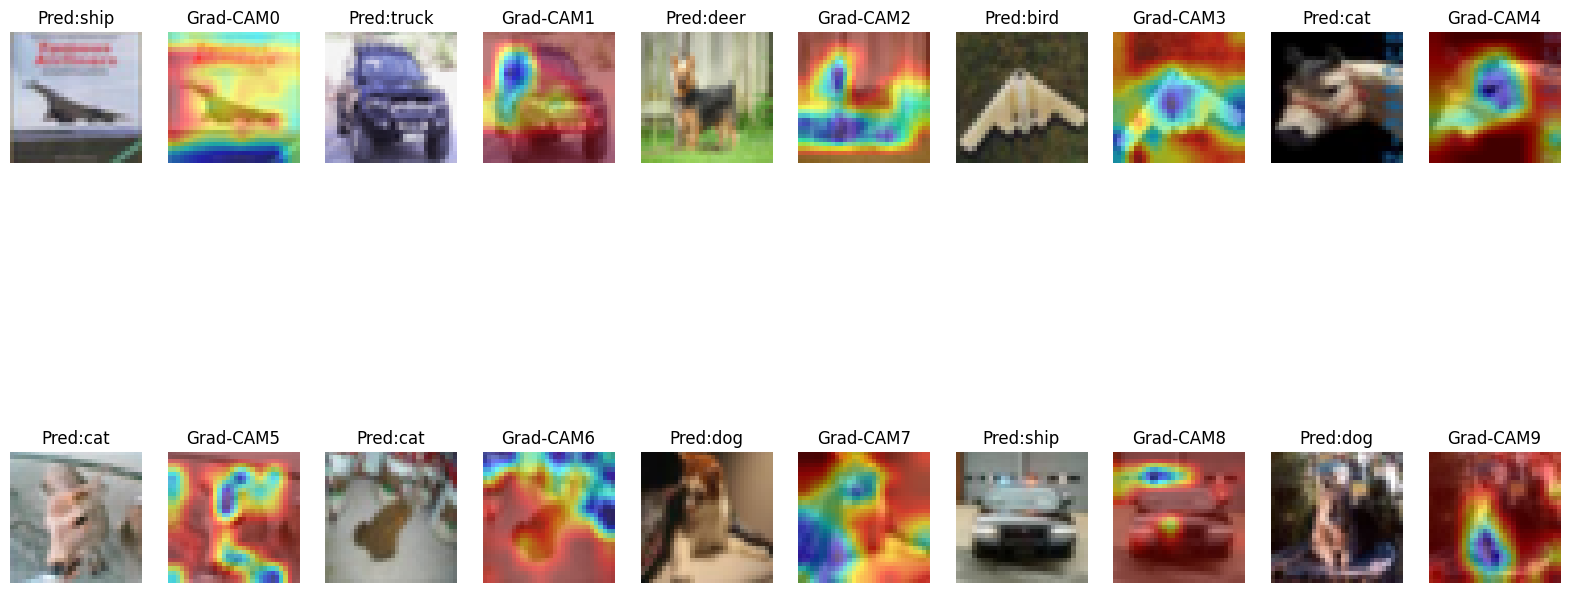

In [35]:
visualize_gradcam(net,device,misclassified_images, misclassified_predictions, misclassified_targets )